In [31]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [6]:
iris = pd.read_csv('Iris.csv')
print(iris.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [7]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [14]:
print("Avg SepalLength: ",iris['SepalLengthCm'].mean())
print("Avg SepalWidth : ",iris['SepalWidthCm'].mean())
print("Avg PetalLength: ",iris['PetalLengthCm'].mean())
print("Avg PetalWidth : ",iris['PetalWidthCm'].mean())

Avg SepalLength:  5.843333333333334
Avg SepalWidth :  3.0540000000000003
Avg PetalLength:  3.758666666666666
Avg PetalWidth :  1.1986666666666668


In [17]:
print("Trimmed-Mean SepalLength: ",trim_mean(iris['SepalLengthCm'], 0.1))
print("Trimmed-Mean SepalWidth : ",trim_mean(iris['SepalWidthCm'], 0.1))
print("Trimmed-Mean PetalLength: ",trim_mean(iris['PetalLengthCm'], 0.1))
print("Trimmed-Mean PetalWidth : ",trim_mean(iris['PetalWidthCm'], 0.1))

Trimmed-Mean SepalLength:  5.8083333333333345
Trimmed-Mean SepalWidth :  3.0391666666666666
Trimmed-Mean PetalLength:  3.7608333333333333
Trimmed-Mean PetalWidth :  1.1841666666666668


In [18]:
print("Median of SepalLength: ",iris['SepalLengthCm'].median())
print("Median of SepalWidth : ",iris['SepalWidthCm'].median())
print("Median of PetalLength: ",iris['PetalLengthCm'].median())
print("Median of PetalWidth : ",iris['PetalWidthCm'].median())

Median of SepalLength:  5.8
Median of SepalWidth :  3.0
Median of PetalLength:  4.35
Median of PetalWidth :  1.3


In [19]:
print("Std.Deviation of SepalLength: ",iris['SepalLengthCm'].std())
print("Std.Deviation of SepalWidth : ",iris['SepalWidthCm'].std())
print("Std.Deviation of PetalLength: ",iris['PetalLengthCm'].std())
print("Std.Deviation of PetalWidth : ",iris['PetalWidthCm'].std())

Std.Deviation of SepalLength:  0.828066127977863
Std.Deviation of SepalWidth :  0.4335943113621737
Std.Deviation of PetalLength:  1.7644204199522626
Std.Deviation of PetalWidth :  0.7631607417008411


In [22]:
print("IQR of SepalLength: ",iris['SepalLengthCm'].quantile(0.75) - iris['SepalLengthCm'].quantile(0.25))
print("IQR of SepalWidth : ",iris['SepalWidthCm'].quantile(0.75) - iris['SepalWidthCm'].quantile(0.25))
print("IQR of PetalLength: ",iris['PetalLengthCm'].quantile(0.75) - iris['PetalLengthCm'].quantile(0.25))
print("IQR of PetalWidth : ",iris['PetalWidthCm'].quantile(0.75) - iris['PetalWidthCm'].quantile(0.25))

IQR of SepalLength:  1.3000000000000007
IQR of SepalWidth :  0.5
IQR of PetalLength:  3.4999999999999996
IQR of PetalWidth :  1.5


In [23]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(iris['SepalLengthCm'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

               5.0%  25.0%  50.0%  75.0%  95.0%
SepalLengthCm   4.6    5.1    5.8    6.4  7.255


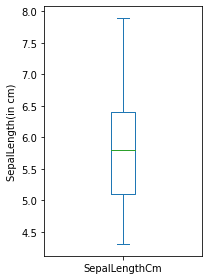

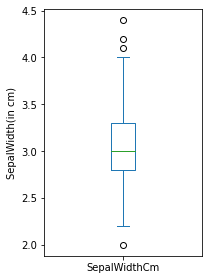

In [28]:
ax = (iris['SepalLengthCm']).plot.box(figsize=(3, 4))
ax.set_ylabel('SepalLength(in cm)')
plt.tight_layout()
plt.show()
bx = (iris['SepalWidthCm']).plot.box(figsize=(3, 4))
bx.set_ylabel('SepalWidth(in cm)')
plt.tight_layout()
plt.show()

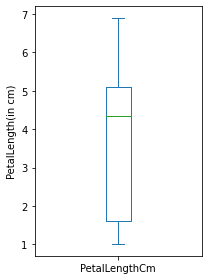

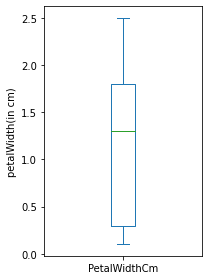

In [34]:
ax = (iris['PetalLengthCm']).plot.box(figsize=(3, 4))
ax.set_ylabel('PetalLength(in cm)')
plt.tight_layout()
plt.show()
bx = (iris['PetalWidthCm']).plot.box(figsize=(3, 4))
bx.set_ylabel('petalWidth(in cm)')
plt.tight_layout()
plt.show()

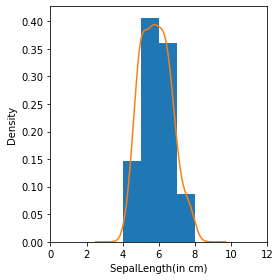

In [35]:
ax = iris['SepalLengthCm'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
iris['SepalLengthCm'].plot.density(ax=ax)
ax.set_xlabel('SepalLength(in cm)')

plt.tight_layout()
plt.show()

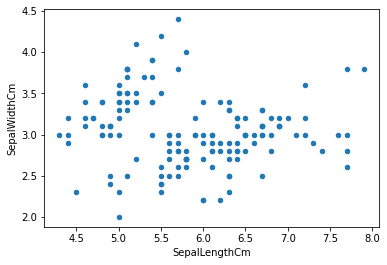

In [8]:
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

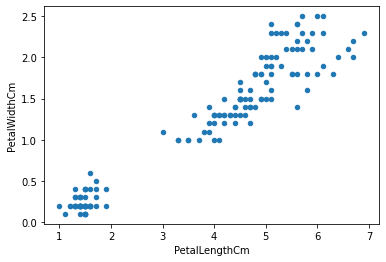

In [9]:
iris.plot(kind="scatter", x="PetalLengthCm", y="PetalWidthCm")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


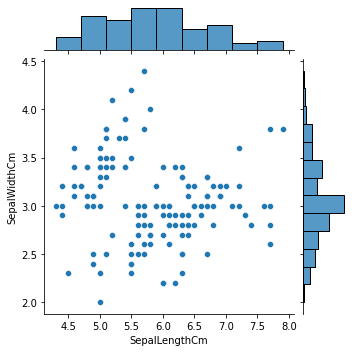

In [10]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


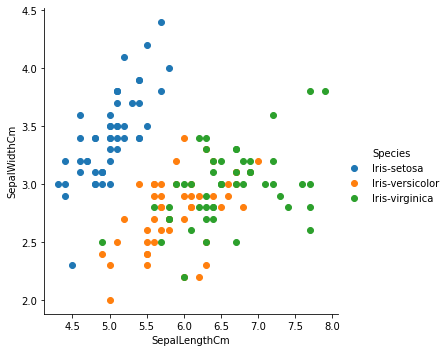

In [24]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

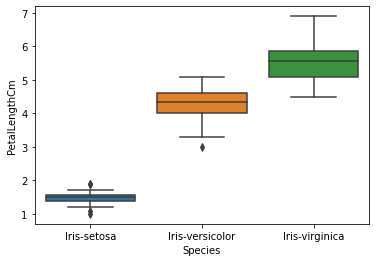

In [25]:
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

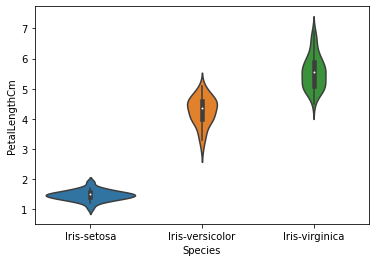

In [36]:
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


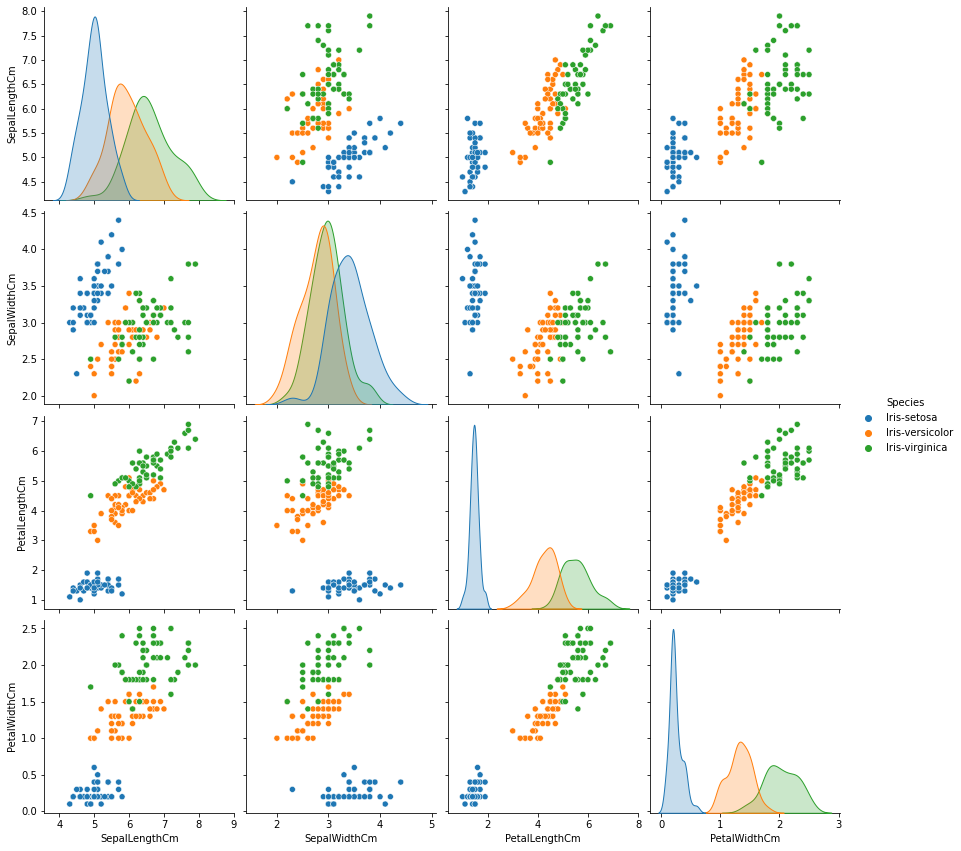

In [37]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


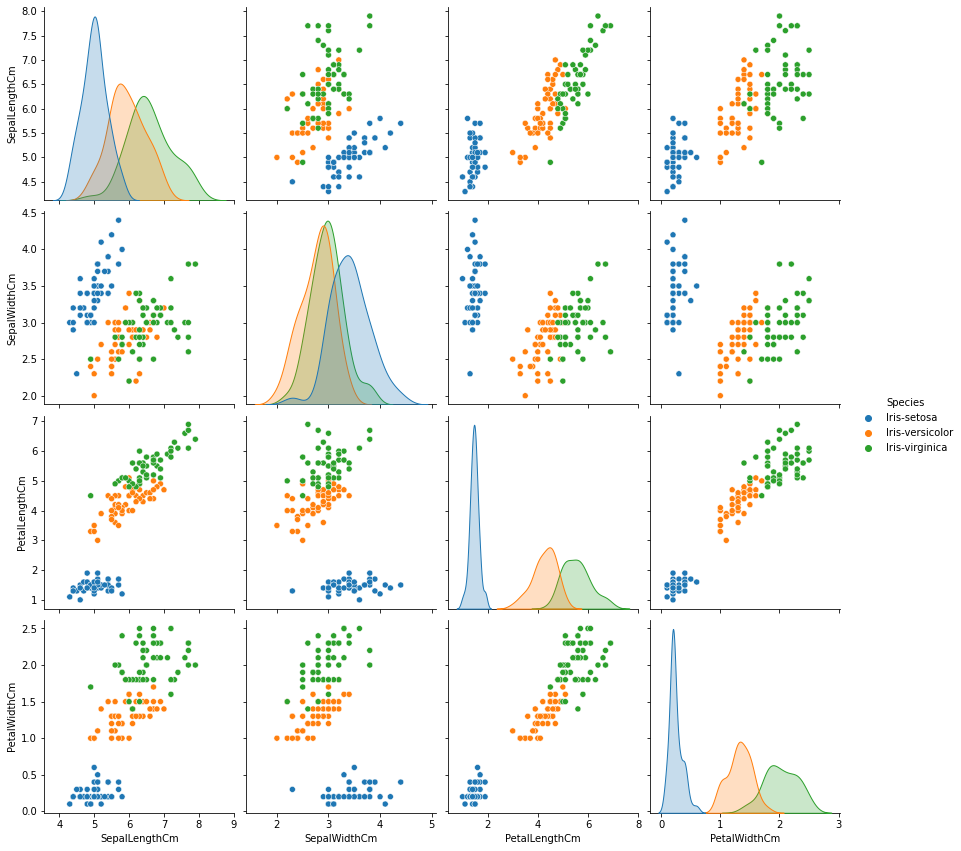

In [38]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

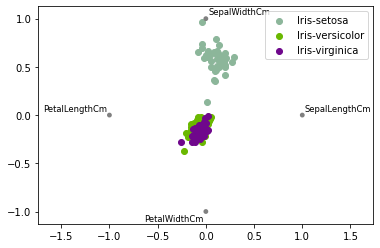

In [40]:
from pandas.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")